In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Text(0.5, 0, 'T(K)')

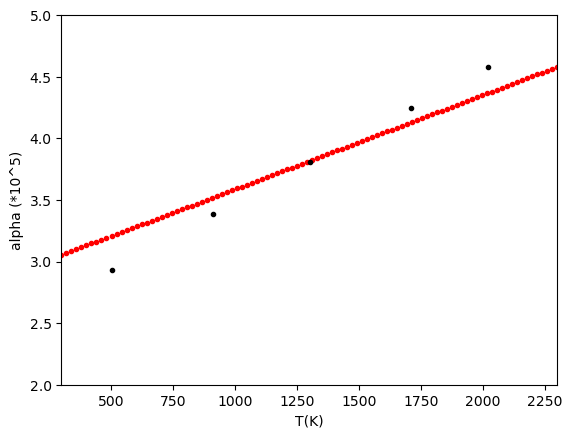

In [29]:
## thermal expansion coefficients - Bouhift et al.  - Not a perfect match, but is within their errorbars 
# ai = Aio + ai1T
# and overal expansion coefficient is aa + ab + ac
T_K=np.linspace(300, 2300, 100)
aa = 0.677/10**5 + T_K*(0.260/10**8)
ab=1.339/10**5 + T_K*(0.142/10**8)
ac=0.809/10**5 + T_K*(0.361/10**8)
alpha=aa+ab+ac
plt.plot(T_K, alpha*10**5, '.r')
plt.xlim([300, 2300])
plt.ylim([2, 5])
plt.ylabel('alpha (*10^5)')
# Benchmarking data extracted from Fig. 3 of Bouhift using webplot digitizer
T_K_bench=[502.4597919, 909.2715232, 1302.838221, 1711.5421, 2019.962157]
Alpha_bench=[2.932586742,	3.387898506,	3.811079514,	4.24897142,	4.5810460727]
plt.plot(T_K_bench, Alpha_bench, '.k')
plt.xlabel('T(K)')

In [32]:
P_GPa=1
G_GPa = 78 + 1.71 * P_GPa - 0.027 * P_GPa**2 # Equation from Abramson et al. 1997
G_GPa

79.68299999999999

In [72]:
Vo_um_radi=10 # initial radius of fluid inclusion
crystal_um_radi = 1000 # initial radius of crystal
Po_kbar=np.linspace(15, 0, 100) # Initial pressure of FI in kbar for consistency with rest of diadfit
Pin_kbar=10 # Present internal pressure of the inclusion in kbar
Pout_kbar=0 # External pressure of the inclusion in kbar 
deltaT=0 # Temp change in K
T_K=1000+273.15


def calculate_alpha_forsterite(T_K):
    """ Calculate linear expansion coefficient of Forsterite as a function of temperature from  Bouhift et al. 1996
    Parameters
    ----------
    T_K: Temp in kelvin

    Returns
    ---------
    alpha in K-1
    """

    
    aa = 0.677/10**5 + T_K*(0.260/10**8)
    ab=1.339/10**5 + T_K*(0.142/10**8)
    ac=0.809/10**5 + T_K*(0.361/10**8)
    alpha=aa+ab+ac
    return alpha

def calculate_G_forsterite(Po_kbar):
    """ Calculate G for Forsterite usingAbramson et al. 1997 """
    Po_GPa=Po_kbar/10
    G_GPa=78 + 1.71 * Po_GPa - 0.027 * Po_GPa**2 # 
    G=G_GPa*10**9
    return G
    
def calculate_K_forsterite(T_K):
    K_GPa=(1290 -0.23*T_K)/10 # equation 20 from Gillet and Guyot 1991, which outputs in bars. 
    K=K_GPa*10**9
    return K

def model_olivine_host_stretching(Vo_um_radi, crystal_um_radi, Po_kbar, Pin_kbar, Pout_kbar,deltaT, T_K  ):
    """
Parameters
------------
Vo_um_radi: Radius of fluid inclusion in microns
crystal_um_radi: Radius of crystal in microns
Po_kbar: Initial pressure of FI in kbar
Pin_kbar: Present internal pressure of FI - not quite sure how this should differ from Po_kbar- unless iteratively solve
Pout_kbar: External pressure of inclusion in kbar
deltaT:Temp change in K
T_K: Initial Temp in K

Returns
-------------
Vol increase as a percentage


"""

    # Conert input units to SI
    Vo_radi=Vo_um_radi/10**6
    crystal_radi=crystal_um_radi/10**6
    Vo_m=(4/3)*np.pi*(Vo_radi)**3 # calculate volume in SI units from this.     
    Po=Po_kbar*10**8 # pressure in Pa
    Pin=Pin_kbar*10**8
    Pout=Pout_kbar*10**8
    # calculate parameters needed for equation 1 of Yamamoto and Kagi, 2006. 
    x=(Vo_radi**3)/(crystal_radi**3)
    alpha=calculate_alpha_forsterite(T_K)
    G=calculate_G_forsterite(Po_kbar)
    K=calculate_K_forsterite(T_K)
    deltaVVo=(Po-Pout)/K + alpha * deltaT + (Pin-Pout)/(1-x) * ((x/K) + (3/(4*G)))

    return deltaVVo*100 # return as a percent

## Recreating plot in paper

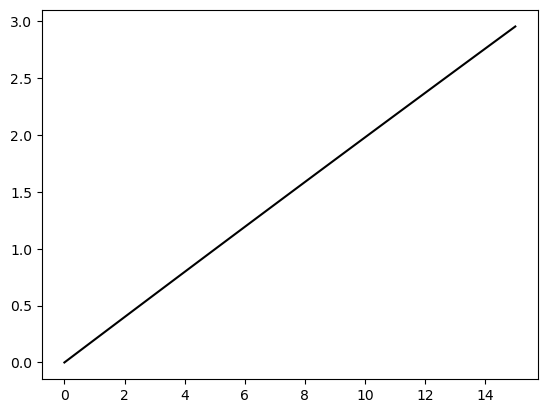

In [84]:
test_vol_increase_Fig1=model_olivine_host_stretching(Vo_um_radi=10, crystal_um_radi=500, Po_kbar=np.linspace(0, 15, 100), Pin_kbar=np.linspace(0, 15, 100), 
                                           Pout_kbar=0,deltaT=0, T_K=1150+273.15  )

plt.plot(np.linspace(0, 15, 100), test_vol_increase_Fig1, '-k')

Text(0, 0.5, 'deltaV/V %')

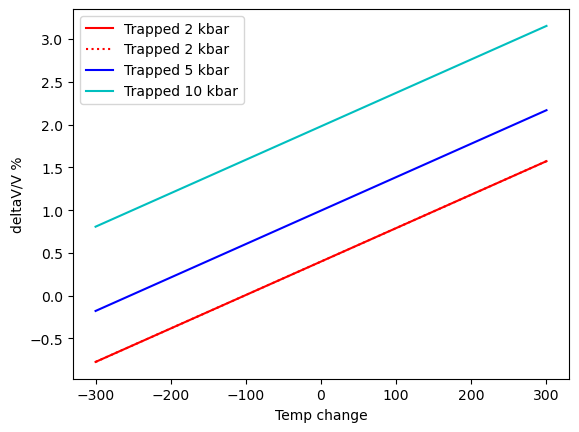

In [83]:
test_vol_increase_2kbar=model_olivine_host_stretching(Vo_um_radi=10, crystal_um_radi=500, Po_kbar=2, Pin_kbar=2, 
                                           Pout_kbar=0,deltaT=np.linspace(300, -300), T_K=1150+273.15  )
test_vol_increase_2kbar_1um=model_olivine_host_stretching(Vo_um_radi=1, crystal_um_radi=500, Po_kbar=2, Pin_kbar=2, 
                                           Pout_kbar=0,deltaT=np.linspace(300, -300), T_K=1150+273.15  )
test_vol_increase_5kbar=model_olivine_host_stretching(Vo_um_radi=10, crystal_um_radi=500, Po_kbar=5, Pin_kbar=5, 
                                           Pout_kbar=0,deltaT=np.linspace(300, -300), T_K=1150+273.15  )
test_vol_increase_10kbar=model_olivine_host_stretching(Vo_um_radi=10, crystal_um_radi=500, Po_kbar=10, Pin_kbar=10, 
                                           Pout_kbar=0,deltaT=np.linspace(300, -300), T_K=1150+273.15  )
plt.plot(np.linspace(300, -300), test_vol_increase_2kbar, '-r', label='Trapped 2 kbar')
plt.plot(np.linspace(300, -300), test_vol_increase_2kbar_1um,':r', label='Trapped 2 kbar')
plt.plot(np.linspace(300, -300), test_vol_increase_5kbar, '-b', label='Trapped 5 kbar')
plt.plot(np.linspace(300, -300), test_vol_increase_10kbar, '-c', label='Trapped 10 kbar')
plt.legend()
plt.xlabel('Temp change')
plt.ylabel('deltaV/V %')


Text(0, 0.5, 'deltaV/V')

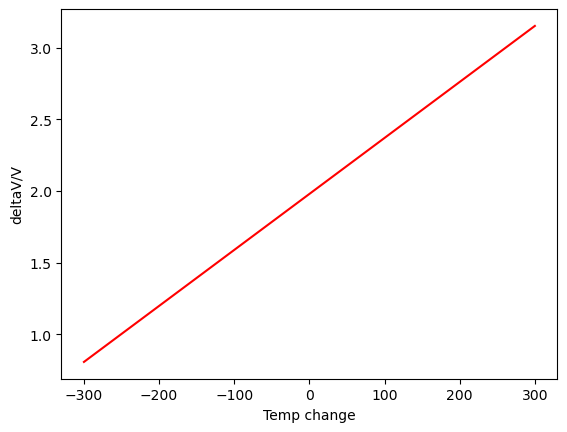

In [73]:
test_vol_increase=model_olivine_host_stretching(Vo_um_radi=10, crystal_um_radi=500, Po_kbar=10, Pin_kbar=10, 
                                           Pout_kbar=0,deltaT=np.linspace(300, -300), T_K=1150+273.15  )
plt.plot(np.linspace(300, -300), test_vol_increase, '-r')
plt.xlabel('Temp change')
plt.ylabel('deltaV/V')

## This all makes sense - As pressure drops, host expands, and fluid inclusion volume increases. If you heat up, FI expands more, because the host is expanding for two reasons. If you cool, expands less. 
- Needs solving iteratively - ascent a little, calculate deltaV/Vo, recalculate density using geometry, recalculate P using EOS, then do next step. 

## figures from Yamamato (Eq 1)

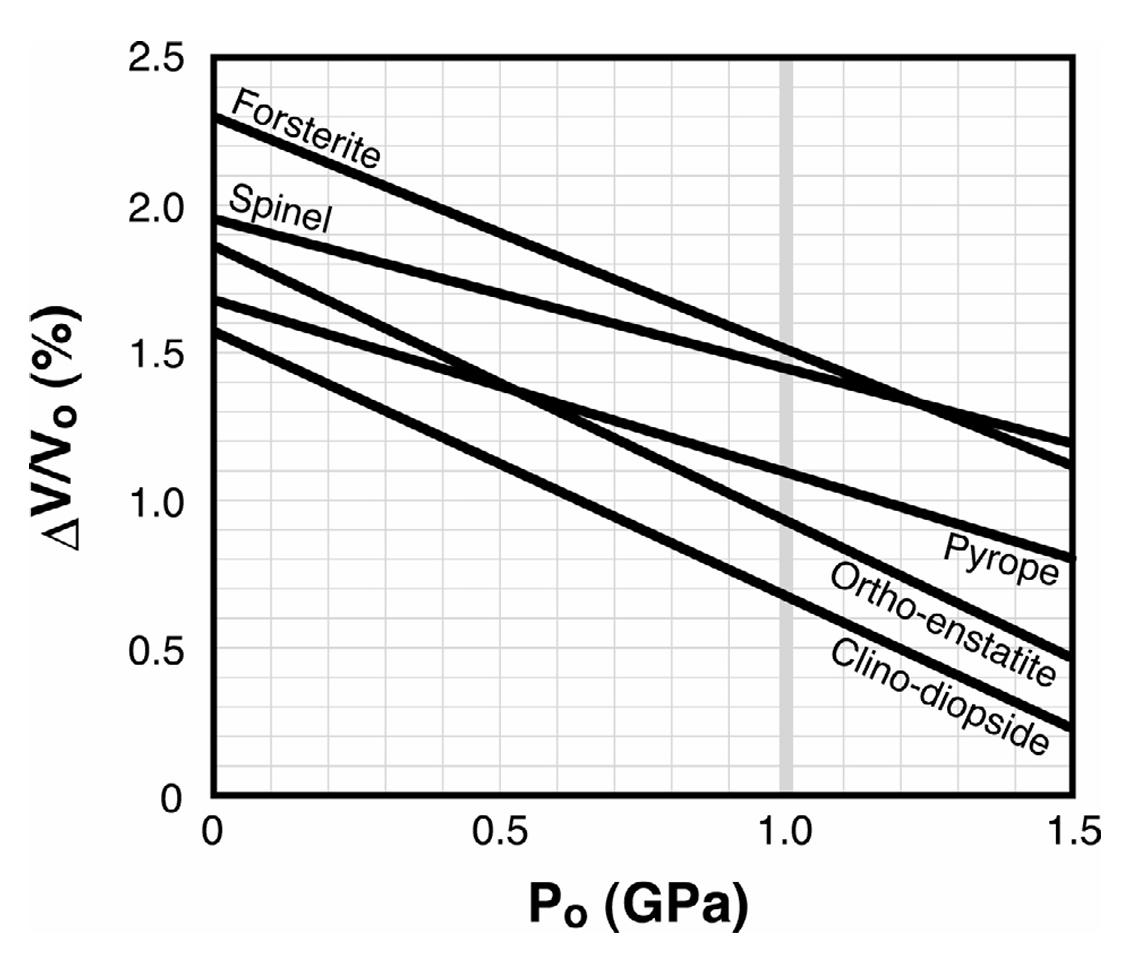

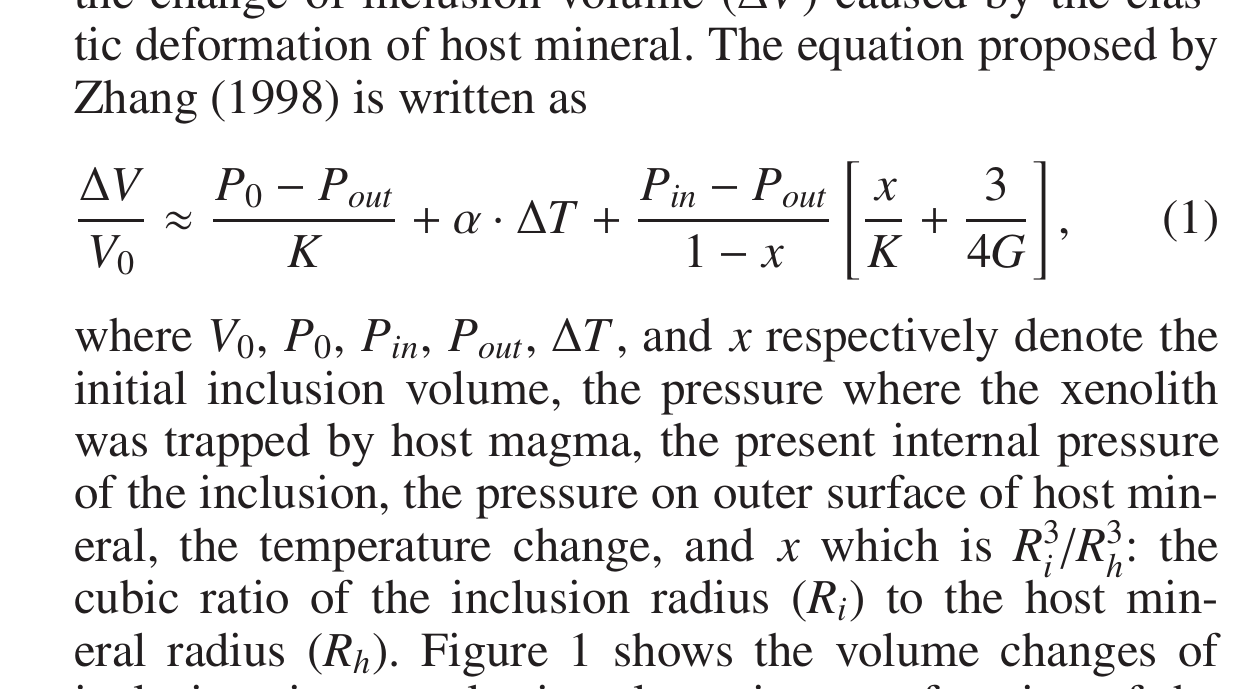